<a href="https://colab.research.google.com/github/IsauraQuintero/Curso2/blob/master/Actividades_IQO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

**Optimizadores SGD y Adam con normalización Gradient clipping**

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
modelo=Sequential()
modelo.add(Dense(4,activation='sigmoid',input_shape=(4,)))
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(3,activation='softmax'))
optim=SGD(clipnorm=1)
modelo.compile(optim,loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()
modelo.fit(x=X,y=y, batch_size=10,epochs=500)


In [ ]:
optim2=Adam(clipnorm=1)
modelo.compile(optim2,loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()
modelo.fit(x=X,y=y, batch_size=10,epochs=500)


**Regularizadores L1 y L2**

In [ ]:
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.regularizers import l1,l2 #Importar Regularizadores

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
l2_reg=l2()
l1_reg=l1(0.001)
modelo=Sequential()
modelo.add(Dense(4,activation='relu',kernel_regularizer=l2_reg,bias_regularizer=l1_reg,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1')) #puedo simplemente escribir "l1" o "l2"
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dense(3,activation='softmax',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()
modelo.fit(x=X,y=y, batch_size=10,epochs=500)


**Inicializador Glorot (uniforme y normal)** 

In [ ]:
from tensorflow.keras.initializers import glorot_normal #Importar el inicializador
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
glorotinit=glorot_normal()
modelo=Sequential()
modelo.add(Dense(4,activation='relu',kernel_initializer=glorotinit,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal')) #puedo escribir simiplemente "glorot_normal"
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal'))
modelo.add(Dense(3,activation='softmax',kernel_initializer='glorot_normal'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

In [ ]:
glorotinit2=glorot_uniform()
modelo=Sequential()
modelo.add(Dense(4,activation='relu',kernel_initializer=glorotinit2,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_uniform')) 
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_uniform'))
modelo.add(Dense(3,activation='softmax',kernel_initializer='glorot_uniform'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

**Función de activación ReLU y Normalización Batch Normalization** 

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='relu',input_shape=(4,)))
modelo.add(Dense(4,activation='relu'))
modelo.add(BatchNormalization())
modelo.add(Dense(4,activation='relu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

**Función de costo  MAE**

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='relu',input_shape=(4,)))
modelo.add(Dense(4,activation='relu'))
modelo.add(BatchNormalization())
modelo.add(Dense(4,activation='relu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile('sgd',loss='mean_absolute_error',metrics=['accuracy'])
modelo.summary()
history = modelo.fit(x=X,y=y, batch_size=10,epochs=500)

In [ ]:
# plot loss during training
plt.title('Loss / mean absolute error')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

**EJERCICIO DE TRANFER LEARNING**

> CNN VGG16



In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG16
from matplotlib import pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.datasets import cifar100

169017344/169001437 [==============================] - 14s 0us/step


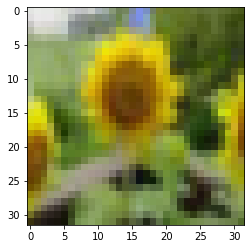

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
plt.imshow(x_train[12])

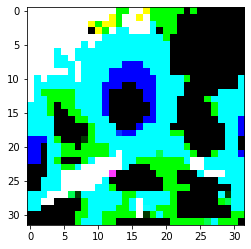

In [ ]:
x_train=preprocess_input(x_train)
x_test=preprocess_input(x_test)
plt.imshow(x_train[12])

In [ ]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(32, 32, 3))
conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False
for layer in conv_base.layers:
    print(layer, layer.trainable)

#Capas densas
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

<keras.engine.input_layer.InputLayer object at 0x7fc58b9ad410> False
<keras.layers.convolutional.Conv2D object at 0x7fc5fa2b6710> False
<keras.layers.convolutional.Conv2D object at 0x7fc5843a13d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc5843a1410> False
<keras.layers.convolutional.Conv2D object at 0x7fc584293e50> False
<keras.layers.convolutional.Conv2D object at 0x7fc584328650> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc58429b2d0> False
<keras.layers.convolutional.Conv2D object at 0x7fc58429d390> False
<keras.layers.convolutional.Conv2D object at 0x7fc5842a1e50> False
<keras.layers.convolutional.Conv2D object at 0x7fc5844a0ed0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc5842ad490> False
<keras.layers.convolutional.Conv2D object at 0x7fc5842b1a10> False
<keras.layers.convolutional.Conv2D object at 0x7fc584424f90> False
<keras.layers.convolutional.Conv2D object at 0x7fc58423b410> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc584243550>

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 1204s 771ms/step - loss: 2.7541 - acc: 0.2692 - val_loss: 2.5781 - val_acc: 0.3509
Epoch 2/10
1563/1563 [==============================] - 1200s 768ms/step - loss: 2.4154 - acc: 0.3481 - val_loss: 2.2753 - val_acc: 0.4049
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 2.1954 - acc: 0.4056

**RNN Ejercicio 2**

Basado en el ejemplo de forecasting, prediga el precio de stock ( de apertura) para el sigueinte dataset 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'. Primero implmente una arquitectura many-to-one, para predecir el valores de stock un tiempo adelante, lego convierta el problema en un many-to-many para predecir el valor de stock 10 pasos temporales adelante

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data_set = pd.read_csv(url)
data_set.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data_set.shape

(2035, 8)

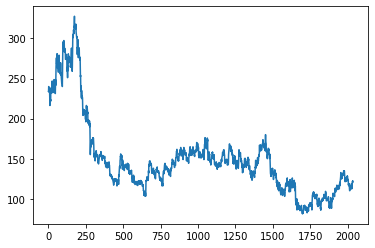

In [ ]:
data_set = data_set.reindex(index= data_set.index[::-1])
plt.plot(data_set['Open'])

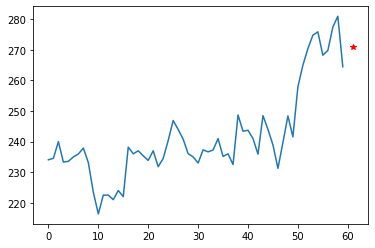

In [ ]:
plt.plot(np.arange(0,60),data_set.iloc[:60,1])
plt.plot(61,data_set.iloc[60,1],'r*')

In [ ]:
data_set = data_set[['Open']]
scale = StandardScaler()
data_set = scale.fit_transform(data_set)

In [ ]:
X = []
y = []
for i in np.arange(60,2035):
  X.append(data_set[i-60:i,0])
  y.append(data_set[i,0])

X = np.array(X)
y = np.array(y)

In [ ]:
X = X.reshape((-1,60,1))
y = y.reshape((-1,1))
print(X.shape, y.shape)

(1975, 60, 1) (1975, 1)


In [ ]:
X_train, X_test , y_train,y_test = train_test_split(X,y)

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True , input_shape=[None,1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 20)          1760      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='nadam')

In [ ]:
model.fit(X_train,y_train, epochs=10, validation_split=0.2, validation_data=(X_test,y_test))

Epoch 1/10
37/37 [==============================] - 9s 32ms/step - loss: 0.3184 - val_loss: 0.0855
Epoch 2/10
37/37 [==============================] - 0s 10ms/step - loss: 0.0530 - val_loss: 0.0352
Epoch 3/10
37/37 [==============================] - 0s 10ms/step - loss: 0.0310 - val_loss: 0.0266
Epoch 4/10
37/37 [==============================] - 0s 11ms/step - loss: 0.0275 - val_loss: 0.0225
Epoch 5/10
37/37 [==============================] - 0s 11ms/step - loss: 0.0238 - val_loss: 0.0199
Epoch 6/10
37/37 [==============================] - 0s 12ms/step - loss: 0.0218 - val_loss: 0.0183
Epoch 7/10
37/37 [==============================] - 0s 11ms/step - loss: 0.0204 - val_loss: 0.0186
Epoch 8/10
37/37 [==============================] - 0s 11ms/step - loss: 0.0184 - val_loss: 0.0181
Epoch 9/10
37/37 [==============================] - 0s 11ms/step - loss: 0.0177 - val_loss: 0.0153
Epoch 10/10
37/37 [==============================] - 0s 11ms/step - loss: 0.0166 - val_loss: 0.0143


In [ ]:
y_predict = model.predict(X_test)

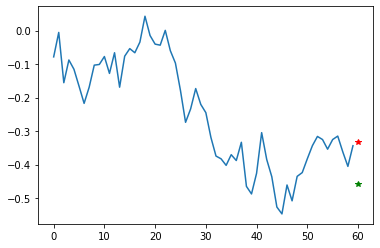

In [ ]:
plt.plot(X_test[0,:,0])
plt.plot(60, y_predict[0], 'r*')
plt.plot(60,y_test[0], 'g*')

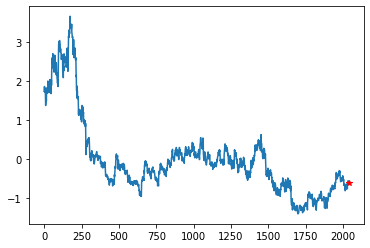

In [ ]:
prediction = model.predict(data_set.reshape((1,-1,1)))
plt.plot(data_set)
plt.plot(2036,prediction, 'r*')

**YOLO Algoritmo**

Apartir el ejemplo visto , implementar el modelo yolov3 para realizar deteccion en alguna figura que usted quiera (puede usar las figuras que se encuntran en la carpeta). En este link se encuntra un archivo llamado yolov3.py el cual contiene todas las funciones anteriormente vistas , importelo para hacer el trabajo mas facil.

In [ ]:
!curl -O https://pjreddie.com/media/files/yolov3.weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  236M  100  236M    0     0  38.5M      0  0:00:06  0:00:06 --:--:-- 44.3M


In [ ]:
# Selección del la versión 1 de tensorflow
%tensorflow_version 1.x

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Figuras

/content/drive/My Drive/Colab Notebooks/Figuras


In [ ]:
ls

Elefante.jfif  Gato.jfif


In [ ]:
%tensorflow_version 1.x

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
import yolov3

ModuleNotFoundError: ignored